Impoting Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
from pylab import rcParams

Importing Training dataset

In [ ]:
df = pd.read_csv('train_labeledTrainData - Sheet1.csv')

<Axes: xlabel='sentiment', ylabel='count'>

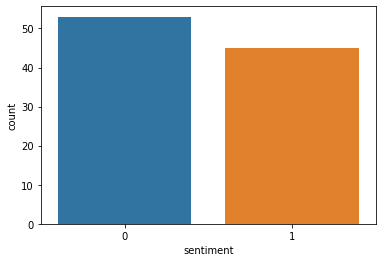

In [ ]:
sns.countplot(x='sentiment',data=df)

Data pre-processing

In [ ]:
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
corpus = text_transformation(df['review'])

Text Data Visualisation

In [ ]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)


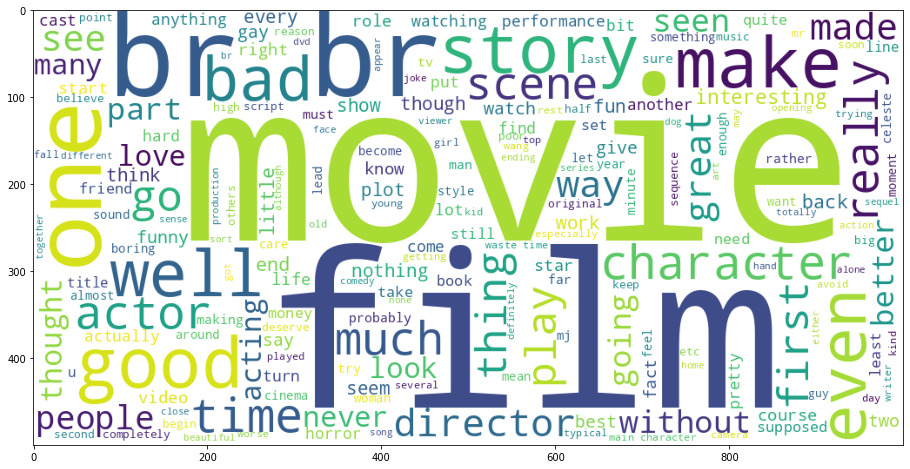

In [ ]:
plt.imshow(wordcloud)

Converting the text data into vectors

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.sentiment

Building machine learning model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X,y)

LogisticRegression()

Test Data Transformation

In [ ]:
test_df = pd.read_csv('test_labeledTrainData - Sheet1.csv')

In [ ]:
X_test,y_test = test_df.review,test_df.sentiment

In [ ]:
test_corpus = text_transformation(X_test)

In [ ]:
testdata = cv.transform(test_corpus)

Fitting test data for Prediction

In [ ]:
predictions = lr.predict(testdata)

Confusion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

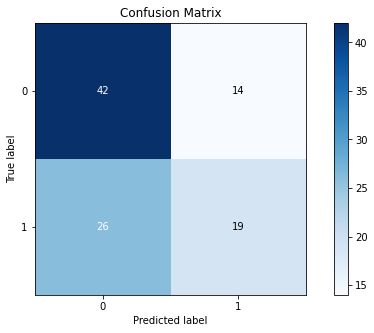

In [ ]:
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)

Classification Report

In [ ]:
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

Accuracy_score:  0.6039603960396039
Precision_score:  0.5757575757575758
Recall_score:  0.4222222222222222
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.75      0.68        56
           1       0.58      0.42      0.49        45

    accuracy                           0.60       101
   macro avg       0.60      0.59      0.58       101
weighted avg       0.60      0.60      0.59       101



Prediction

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [ ]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = lr.predict(transformed_input)
    expression_check(prediction)


In [ ]:
input1 = ["Anyone who knows me even remotely can tell you that I love bad movies almost as much as I love great ones, and I can honestly say that I have finally seen one of the all-time legendary bad movies: the almost indescribable mess that is MYRA BRECKINRIDGE. An adaptation of Gore Vidal's best-selling book (he later disowned this film version), the star-studded MYRA BRECKINRIDGE is truly a movie so bad that it remains bizarrely entertaining from beginning to end. The X-rated movie about sex change operations and Hollywood was an absolute catastrophe at the box office and was literally booed off the screen by both critics and audiences at the time of it's release. Not surprisingly, the film went on to gain a near-legendary cult status among lovers of bad cinema, and I was actually quite excited to finally see for the first time.<br /><br />Director Michael Sarne (who only had two other previous directing credits to his name at the time), took a lot of flack for the finished film, and, in honesty, it really does not look like he had a clue about what he was trying to achieve. The film is often incoherent, with entire sequences edited together in such a half-hazzard manner that many scenes become nearly incomprehensible. Also irritating is the gimmick of using archival footage from the Fox film vaults and splicing it into the picture at regular intervals. This means that there is archival footage of past film stars such as Judy Garland and Shirley Temple laced into newly-film scenes of often lewd sexual acts, and the process just doesn't work as intended (this also caused a minor uproar, as actors such as Temple and Loretta Young sued the studio for using their image without permission).<br /><br />Perhaps Sarne is not the only one to blame, however, as the film's screenplay and casting will also make many viewers shake their heads in disbelief. For instance, this film will ask you to believe that the scrawny film critic Rex Reed (in his first and last major film role) could have a sex change operation and emerge as the gorgeous sex goddess Raquel Welch?! The film becomes further hard to follow when Welch as Myra attempts to take over a film school from her sleazy uncle (played by legendary film director John Huston), seduce a nubile female film student (Farrah Fawcett), and teach the school's resident bad boy (Roger Herren) a lesson by raping him with a strap-on dildo. Did everyone follow that? <br /><br />And it gets even better (or worse, depending upon your perspective)! I have yet to mention the film's top-billed star: the legendary screen sex symbol of the nineteen-thirties, Mae West! Ms. West was 77 year old when she appeared in this film (she had been retired for 26 years), and apparently she still considered herself to be a formidable sex symbol as she plays an upscale talent agent who has hunky men (including a young Tom Selleck) throwing themselves at her. As if this weren't bad enough, the tone-deaf West actually performs two newly-written songs about halfway through the film, and I think that I might have endured permanent brain damage from listening to them! <br /><br />Naturally, none of this even closely resembles anything that any person of reasonable taste would describe as \good,\" but I would give MYRA BRECKINRIDGE a 4 out of 10 because it was always morbidly entertaining even when I had no idea what in the hell was supposed to be going on. Also, most of the cast tries really hard. Raquel, in particular, appears so hell-bent in turning her poorly-written part into something meaningful that she single-handedly succeeds in making the movie worth watching. If she had only been working with a decent screenplay and capable director then she might have finally received some respect form critics.<br /><br />The rest of the cast is also fine. The endearingly over-the-top John Huston (who really should have been directing the picture) has some funny moments, Rex Reed isn't bad for a non-actor, and Farrah Fawcett is pleasantly fresh-faced and likable. Roger Herren is also fine, but he never appeared in another movie again after this (I guess he just couldn't live down being the guy who was rapped by Raquel Welch). And as anyone could guess from the description above, Mae West was totally out of her mind when she agreed to do this movie - but that's part of what makes it fun for those of us who love bad cinema."]
input2 = ["I have seen about a thousand horror films. (my favorite type) This film is among the worst. For me, an idea drives a movie. So, even a poorly acted, cheaply made movie can be good. Something Weird is definitely cheaply made. However, it has little to say. I still don't understand what the karate scene in the beginning has to do with the film. Something Weird has little to offer. Save yourself the pain!"]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
